## Assignment2 Vehicle Detection

### !!! Warning !!!
#### this detection is coding in win10 platform, 
#### also using the git version control system is hard to upload all these data
#### If you want to check the answer is correct or not, 
#### plz change the absolute dir to relative dir in MacOS or other system.
#### Sorry for bringing you troubles.

#### before testing create the directory and change the directory

In [1]:
# This assignment has the following step
# 1st step: data processing(in the img_processing part)
# 2nd step: feature extraction
# 3rd step: training process
# 4th step: evaluation process

In [2]:
# Here are some sample which implement the Vehicle detection based on HOG + Color histogram + SVM
# Source: https://github.com/ckirksey3/vehicle-detection-with-svm
# Another Chinese Version of Vehicle Detection
# Source: https://zhuanlan.zhihu.com/p/60229208

### Feature Extraction

In [3]:
# HOW TO READ IMAGE BY USING OPENCV IN CHINESE DIRECTORY 
# Source: https://www.programmersought.com/article/3090516575/
# If you are using the macos or other system,
# Plz change the image read function to cv2.imread()
def cv_imread(file_path):
    cv_img = cv2.imdecode(np.fromfile(file_path,dtype=np.uint8),-1)
    return cv_img

In [4]:
import numpy as np 
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt
from tqdm import tqdm

In [5]:
# This Assignment used the Hog + color histogram
# This is Due to that the output vector can easily connect with each other
# You can also choose the SIFT, but SIFT needs to create the Bag of Words
# This will increate the work, also hard for freshman to implement

In [6]:
# The Hog feature also used in object detection
# Source: https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/
# Example Of using Hog
# Source: https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html

In [7]:
# If want to check the answer plz change the dir in other system platform

# Setting the directory with the absolute directory in WIN10
vehicle_data_dir = 'C:\\Users\\75611\\Desktop\\Data\\vehicle_data\\'
nonvehicle_data_dir = 'C:\\Users\\75611\\Desktop\\Data\\nonvehicle_data\\'
# select an image as the test sample to check the hog and color
test_sample = 'C:\\Users\\75611\\Desktop\\Data\\vehicle_data\\IMG_25.png'

In [8]:
# Here need to use Hog-----> Parameters
# Source: https://www.kite.com/python/docs/skimage.feature.hog#
# The return has 2 return which are newarr and hog_image
# You can also find this code from the following reference
# source: Source: https://github.com/ckirksey3/vehicle-detection-with-svm

# the current version of skimage should change visualise to visualize!!!!
def get_hog_features(img):
    # visualise == False ----> hog img connot see ----> 1 output
    hog_features = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), transform_sqrt=True,visualize=False, feature_vector=True)
    # get the return features
    return hog_features

In [9]:
# This test is to check the hog function is right or not
# Check the HOG method
feature_test_image1 = cv2.imread(test_sample)
# This is because plt should based on RGB ----> convert the color
test_hog_image1 = cv2.cvtColor(feature_test_image1, cv2.COLOR_BGR2RGB)
hog_features1 = get_hog_features(test_hog_image1[:,:,0])

# check the hog function 
# check the return value of hog function
print(type(hog_features1))
print(len(hog_features1))

<class 'numpy.ndarray'>
1764


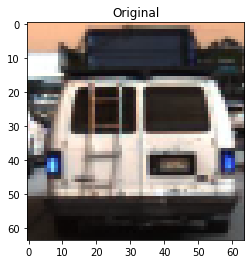

In [10]:
# check the original 
# plt.title('Original')
# plt.imshow(feature_test_image1)
# plt.show()


In [11]:
# The bin spatial is to get the binned color features
# Set the size as 32 * 32
# You can also find the similar code from the following reference
# source: Source: https://github.com/ckirksey3/vehicle-detection-with-svm
size_tuple = (32,32)
def bin_spatial(image,img_size=size_tuple):
    features = cv2.resize(image,img_size)
    # Change the array to 1-D array
    # Source: https://numpy.org/doc/stable/reference/generated/numpy.ravel.html
    flatten_feature = features.ravel()
    return flatten_feature

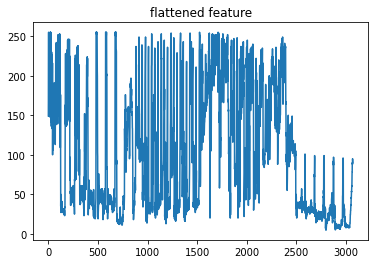

In [12]:
# Based on the previous test image we can get the following result
# This test is to check the bin_spatial function is right or not
flatteded_feature1 = bin_spatial(test_hog_image1)
# print the image graph
plt.plot(flatteded_feature1)
plt.title('flattened feature')
plt.show()

In [13]:
# You can also find the similar code from the following reference
# source: Source: https://github.com/ckirksey3/vehicle-detection-with-svm
def colour_histogram(image, nbins=32, bins_range=(0,256)):
    channel_tuple = ()
    # np histogram needs 3 parameters
    # Source: https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
    first_channel = image[:,:,0]
    second_channel = image[:,:,1]
    third_channel = image[:,:,2]
    # generating the first channel histogram
    channel1_histogram = np.histogram(first_channel, bins=nbins, range=bins_range)
    channel_tuple = channel_tuple + channel1_histogram
    # generating the second channel histogram
    channel2_histogram = np.histogram(second_channel, bins=nbins, range=bins_range)
    channel_tuple = channel_tuple + channel2_histogram
    # generating the third channel histogram
    channel3_histogram = np.histogram(third_channel, bins=nbins, range=bins_range)
    channel_tuple = channel_tuple + channel3_histogram
    # connect 3 channel together different from stack
    # can setting the the axis to decide the direction of connection
    # Source: https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html
    hist_features = np.concatenate(channel_tuple,axis=0)
    return hist_features

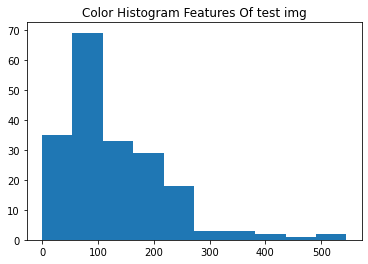

In [14]:
# Based on the previous test image we can get the following result
# This test is to check the color_histogram function is right or not
test_hist_features1= colour_histogram(test_hog_image1)
plt.hist(test_hist_features1)
plt.title('Color Histogram Features Of test img')
plt.show()

In [15]:
# Define a function to extract features from a single image window
# This image window just silding image to get the features
# You can also find the similar code from the following reference
# source: Source: https://github.com/ckirksey3/vehicle-detection-with-svm

# color space dictionary
def single_img_features(image, color_space='RGB'):

    feature_list = list()
    color_space_dict = {'HSV':cv2.COLOR_RGB2HSV,'HLS':cv2.COLOR_RGB2HLS,'LUV':cv2.COLOR_RGB2LUV,'YCrCb':cv2.COLOR_RGB2YCrCb,'YUV':cv2.COLOR_RGB2YUV}
    # Check the current image sapce and doing the convert operation
    if color_space != 'RGB':
        if color_space == 'HSV':
            converted_image = cv2.cvtColor(image, color_space_dict.get('HSV'))
        elif color_space == 'HLS':
            converted_image = cv2.cvtColor(image, color_space_dict.get('HLS'))
        elif color_space == 'LUV':
            converted_image = cv2.cvtColor(image, color_space_dict.get('LUV'))
        elif color_space == 'YCrCb':
            converted_image = cv2.cvtColor(image, color_space_dict.get('YCrCb'))
        elif color_space == 'YUV':
            converted_image = cv2.cvtColor(image, color_space_dict.get('YUV'))
    else: 
        # just like copy the matrix, due to the cv object is ndarray
        # Source: https://numpy.org/doc/stable/reference/generated/numpy.copy.html
        converted_image = np.copy(image)

    # check whther need to compute the bin_spatial
    # Using the previous bin_spatial function to get the bin_spatial_features
    bin_spatial_features = bin_spatial(converted_image, img_size=(32, 32))
    feature_list.append(bin_spatial_features)
    

    # check whther need to compute the colour_histogram
    # Using the previous colour_histogram function to get the colour_histogram_features
    colour_histogram_features = colour_histogram(converted_image, nbins=32)
    feature_list.append(colour_histogram_features)


    # check whther need to compute the hog_features
    # 2 kinds situation all feature or hog feature
    # this 2 mean getting all three channels which are channel 0 channel 1 channel 2
    # getting all 3 channels of the HOG
    hog_features = list()
    all_channels = converted_image.shape[2]
    for channel in range(all_channels):
        hog_features.extend(get_hog_features(converted_image[:,:,channel]))      

    feature_list.append(hog_features)

    # Return concatenated array of features / connecting these features
    # This is also the advantage why choosing hog color histogram 
    # Easy to do the vector connection, No Bow implementation
    return np.concatenate(feature_list)

In [16]:
# You can also find the similar code from the following reference
# source: Source: https://github.com/ckirksey3/vehicle-detection-with-svm

# extract feature based on the single_img_features --based on--> get_hog_features / bin_spatial / colour_histogram
def extract_features(images, color_space='RGB'):
    # Create a list to append feature vectors to
    features_collector = list()
    # Iterate through the list of images
    for image in images:
        # image = cv2.imread(img)
        imag_features = single_img_features(image, color_space=color_space)
        features_collector.append(imag_features)
    # Return list of feature vectors
    return features_collector

### Training Process

In [17]:
# How to use shuffle to disorder the input images
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html
from sklearn.utils import shuffle
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Recursively searching the file in the dir
# Source: https://docs.python.org/3/library/glob.html
import glob
# Using pickle for Object Serialization
# Source: https://docs.python.org/3/library/pickle.html
import pickle
# check the current of loading images
from tqdm import tqdm

In [18]:
# This two list is used to store the data
vehicle_image_list = list()
nonvehicle_image_list = list()

In [19]:
# This path is for windows 10 getting all the images from vehicle and nonvehicle dir
# If you are using the Macos plz change the directory
vehicle_path = 'C:\\Users\\75611\\Desktop\\Data\\vehicle_data\\*.png'
nonvehicle_path = 'C:\\Users\\75611\\Desktop\\Data\\nonvehicle_data\\*.png'
# reading the image recursively
# Source: https://docs.python.org/3/library/glob.html
all_vehicles_images = glob.glob(vehicle_path,recursive=True)
all_nonvehicles_images = glob.glob(nonvehicle_path,recursive=True)

In [20]:
# Reading image from the directory
for vehicle_temp_image in tqdm(all_vehicles_images):
    # vehicle_image_list.append(cv_imread(vehicle_temp_image))
    # This is for MacOS reading image
    vehicle_image_list.append(cv2.imread(vehicle_temp_image))
for nonvehicle_temp_image in tqdm(all_nonvehicles_images):
    # nonvehicle_image_list.append(cv_imread(nonvehicle_temp_image))
    # This is for MacOS reading image
    nonvehicle_image_list.append(cv2.imread(nonvehicle_temp_image))

100%|██████████| 10713/10713 [00:03<00:00, 3250.09it/s]


In [21]:
# This process is to test whether the image has read or not
# Already get the data
print(type(vehicle_image_list))
print(type(vehicle_image_list[0]))

<class 'list'>
<class 'numpy.ndarray'>


In [22]:
# Shuffle the image in vehicle_image_list ----> disorder
vehicle_image_list = shuffle(vehicle_image_list)
# Shuffle the image in nonvehicle_image_list ----> disorder
nonvehicle_image_list = shuffle(nonvehicle_image_list)

In [23]:
# Setting these parameter similar with the previous part
# color space ---> HLS
color_space = "HLS"
# spatialsize  ---> 32 * 32 this parameter need test
spatial_size = (32,32)
hist_bin = 32
orient = 9
pix_pr_cell = 8
cell_pr_block = 2
# Getting all channgel features
# this 2 mean getting all three channels which are channel 0 channel 1 channel 2
hog_channel = 2
# get spatial feature
spatial_feat = True
# get histogram feature
hist_feat = True
# get the hog feature
hog_feat = True

In [24]:
# This is for getting all these feature of vehicle image
all_vehicles_feature = extract_features(vehicle_image_list,color_space)

In [25]:
# This is for getting all these feature of non-vehicle image
all_nonvehicles_feature = extract_features(nonvehicle_image_list,color_space)

In [26]:
# Getiting X and Y from the data
# getting vehicle features
vehicle_feature_tuples = (all_vehicles_feature,all_nonvehicles_feature)
# Using the stack to connect
X_data = np.vstack(vehicle_feature_tuples)
# Changing the type to float 64
print(X_data.dtype)
X_data = X_data.astype(np.float64)
print(X_data.dtype)
# Notice the shape of X_data
# the standard Scaler accept 2 dimension
print(X_data.shape)

float64
float64
(21426, 8559)


In [27]:
# training the data from the traing set Normalized the data
# Standardize features by removing the mean and scaling to unit variance
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
X_scaler = StandardScaler().fit(X_data)
scaled_X = X_scaler.transform(X_data)

In [28]:
# getting the training data Y
# Using the one hot code here
# Source: https://en.wikipedia.org/wiki/One-hot
print(type(all_vehicles_feature))
print(type(all_nonvehicles_feature))
vehicle_length = len(all_vehicles_feature)
nonvehicle_length = len(all_nonvehicles_feature)
# Therefore, generating the same length ones and zeros vector to combine the one-hot code
generating_one = np.ones(vehicle_length)
print(generating_one.shape)
generating_zero = np.zeros(nonvehicle_length)
print(generating_zero.shape)
# Finally, Generating the Y
Y = np.hstack((generating_one,generating_zero))
print(Y.shape)

<class 'list'>
<class 'list'>
(10713,)
(10713,)
(21426,)


In [29]:
# 8 : 2 = training : testing
# How to use train test split
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
get_random_number = np.random.randint(0,100)
X_train, X_test, y_train, y_test = train_test_split(scaled_X,Y,test_size=0.2,random_state = get_random_number)

In [30]:
linear_svc_model = LinearSVC()
# Training !
linear_svc_model.fit(X_train,y_train)
# Getting the accuracy
print('Test Accuracy of SVC = ',round(linear_svc_model.score(X_test,y_test), 5))

Test Accuracy of SVC =  0.97457


In [31]:
#　This part is to save the training model to the local position
# saveing the model into the current directory

In [32]:
# save it into a file named svc_save.p
# dumping the data into the file 
# Source: https://docs.python.org/3/library/pickle.html
# with can help to close when finish
with open("linear_SVM.mdl", "wb") as file:
    pickle.dump((linear_svc_model, X_scaler), file)

In [33]:
from sklearn.ensemble import AdaBoostClassifier

In [34]:
# This part is for adaboost ----> hard to convergence
# Understanding adaboost
# https://www.datacamp.com/community/tutorials/adaboost-classifier-python
clf_ada_svc = AdaBoostClassifier(LinearSVC(),algorithm='SAMME',n_estimators=100,learning_rate=0.8,random_state=get_random_number)
clf_ada_svc.fit(X_train,y_train)
print('Test Accuracy of Adaboost SVC = ',round(clf_ada_svc.score(X_test,y_test), 5))

Test Accuracy of Adaboost SVC =  0.97317


In [35]:
# save adaboost model
with open("Ada_Linear_SVC.mdl", "wb") as file:
    pickle.dump((clf_ada_svc, X_scaler), file)

### Searching the data of the Vehicle on the piacture

In [36]:
# getting the training information from the .mdl file
with open("linear_SVM.mdl", "rb") as file:
    linear_svc, X_scaler = pickle.load(file)

In [37]:
# What is heat map
# Source: https://en.wikipedia.org/wiki/Heat_map
# Source: Use Heat Map to Reduce False Positives and Dupe
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Consider each "Box" is like ((x0,y0),(x1,y1))
        # For all pixel in the boundry adding 1 can get the different
        # [y0:y1],[x0,x1]
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1
    # get the heat map
    return heatmap

In [38]:
# This labels is from heat map
# by using the scipy.ndimage.measurements.label can get the label
# More information can find in the following link
# Source: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.measurements.label.html

#  You can also find the similar code from the following reference
# source: Source: https://github.com/ckirksey3/vehicle-detection-with-svm
def draw_label(image, labels):
    copied_image = np.copy(image)
    labels_range = labels[1] + 1
    for vehicle_num in range(1, labels_range):
        # Find pixels with each car_number label value
        non_zero = (labels[0] == vehicle_num).nonzero()

        # getting the value x and y ----> x 1 y 0
        getting_y = non_zero[0]
        getting_x = non_zero[1]

        # To array
        non_array_zero_y = np.array(getting_y)
        non_array_zero_x = np.array(getting_x)

        # The min and the max will create the box
        x_min = np.min(non_array_zero_x)
        y_min = np.min(non_array_zero_y)
        # getting the max value 
        x_max = np.max(non_array_zero_x)
        y_max = np.max(non_array_zero_y)
        bbox = ((x_min,y_min), (x_max, y_max))
        # Draw the box on the image

        cv2.rectangle(copied_image, bbox[0], bbox[1], (0,255,0), 4)
    return copied_image


In [39]:
# You can also find the similar code from the following reference
# source: Source: https://github.com/ckirksey3/vehicle-detection-with-svm

# go through the threshold and set the value of the picture
def heat_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    np.where(heatmap > threshold, heatmap, 0)
    return heatmap

In [40]:
# You can also find the similar code from the following reference
# source: Source: https://github.com/ckirksey3/vehicle-detection-with-svm

# start creating the slide window to search the image
# The windows size 64*64 need test, choose 64 * 64 is due to the previous picture selection
def slide_window_to_search(image, x_start_end=[None, None], y_start_end=[None, None], slide_window=(64, 64), slide_overlap=(0.5, 0.5)):
    list_of_windows = list()

    if x_start_end[0] == None:
        x_start_end[0] = 0
    if x_start_end[1] == None:
        x_start_end[1] = image.shape[1]
    if y_start_end[0] == None:
        y_start_end[0] = 0
    if y_start_end[1] == None:
        y_start_end[1] = image.shape[0]
    # The length of the length/ width of the rectangle
    # using the end point - start point
    x_length = x_start_end[1] - x_start_end[0]
    y_length = y_start_end[1] - y_start_end[0]
    # calculating the step of window movement
    # 64 * (1 - 0.5) = 32
    x_pr_step = slide_window[0]*(1-slide_overlap[0])
    y_pr_step = slide_window[1]*(1-slide_overlap[1])
    # Getting the int step of x and y should move
    int_x_pr_step = np.int64(x_pr_step)
    int_y_pr_step = np.int64(y_pr_step)
    # Calculating the number of windows in x side and y side
    # (Total distance - sliding distance) / per_step = number of steps
    sliding_dis_x = slide_window[0]*(slide_overlap[0])
    sliding_dis_y = slide_window[1]*(slide_overlap[1])
    sliding_dis_x = np.int64(sliding_dis_x)
    sliding_dis_y = np.int64(sliding_dis_y)

    # Distance gap
    x_dis_gap = x_length - sliding_dis_x
    y_dis_gap = y_length - sliding_dis_y
    # Get the number of windows
    number_window_x = (x_dis_gap) / x_pr_step
    number_window_y = (y_dis_gap) / y_pr_step
    # change the value to int
    number_window_x = np.int64(number_window_x)
    number_window_y = np.int64(number_window_y)
    for i in range(0, number_window_y):
        for j in range(0, number_window_x):
            # looping the window and get the location
            # setting the start location of x
            start_x_location = j * int_x_pr_step + x_start_end[0] 
            # setting the end location of x
            end_x_location = start_x_location + slide_window[0]
            # setting the start location of y
            start_y_location = i * int_y_pr_step + y_start_end[0]
            # setting the end location of y
            end_y_location = start_y_location + slide_window[1]
            # Using the start and end create the windowv
            location_tuple = ((start_x_location,start_y_location),(end_x_location,end_y_location))
            list_of_windows.append(location_tuple)
    # Return the list of windows
    return list_of_windows

In [41]:
# You can also find the similar code from the following reference
# source: Source: https://github.com/ckirksey3/vehicle-detection-with-svm

def search_windows(image, windows, svc, scaler, color_space='RGB'):
    #Create an empty list to receive positive detection windows
    windows_images=list()
    #Iterate over all windows in the list
    for window in windows:
        sliced_image = image[window[0][1]:window[1][1], window[0][0]:window[1][0]]
        # In this project, re-setting the image size to 64
        new_img_size =  (64, 64)
        resize_test_image = cv2.resize(sliced_image,new_img_size)
        features = single_img_features(resize_test_image, color_space=color_space)
        array_feature = np.array(features)
        reshaped_feature = array_feature.reshape(1,-1)
        # normalize
        input_feature = scaler.transform(reshaped_feature)
        #Predict
        # Using the previous model to do the predict
        prediction = svc.predict(input_feature)
        # return value is 1 means already predicted
        # Source: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
        if prediction == 1:
            windows_images.append(window)
    #Return windows for positive detections
    return windows_images

### Getting the final result 

In [42]:
# This part of code is similar with the IMG_Processing.ipynb
# Using the same way reading in the testing image from the folder

In [43]:
import numpy as np

In [44]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tqdm import tqdm
# How to use label
# Source: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.measurements.label.html
from scipy.ndimage.measurements import label
color_space_of_test_image='HLS'
# glob getting the directory image recursive
# This is the absolute location, if you want to do the location test plz change this dir based on you computer
test_image_location = "H:\\Data\\benchmark_velocity_test\\clips\\**\\imgs\\040.jpg"
test_images_path = glob.glob(test_image_location, recursive=True)
# This counter is used to label the output image
counter = 1
for test_input_path in tqdm(test_images_path):
    # This is to check the location is right or not
    # print(test_input_path)
    # This function is for win10 chinese directory
    test_image = cv_imread(test_input_path)
    label_image = np.copy(test_image)

    # These following part of data should change to find a good boundry of image
    # Chaning this size to get different result
    y_start_end_dict = {'y_start_end_1':[301, 501],'y_start_end_2':[311, 571],'y_start_end_3':[321, 591],'y_start_end_4':[335, 640]}

    # the dictionary of the slide window size
    slide_window_dict = {'16':(16,16),'32':(32,32),'64':(64,64),'96':(96,96),'128':(128,128),'256':(256,256),'64128':(64,128),'3264':(32,64)}
    # the dictionary of the slide overlap rate
    slide_overlap_rate = {'0.15':(0.15,0.15),'0.25':(0.25,0.25),'0.5':(0.5,0.5),'0.75':(0.75,0.75),'0.7':(0.70,0.70)}

    # Getting different sized window to searching the vehicle
    # The current best is 3 size 64 from 0.25 0.5 0.75
    # The current best is 3 size 128 from 0.25 0.5 0.75
    windows1 = slide_window_to_search(test_image, x_start_end=[None, None], y_start_end=y_start_end_dict.get('y_start_end_1'),
                                      slide_window=slide_window_dict.get('64'), slide_overlap=slide_overlap_rate.get('0.75'))
    windows2 = slide_window_to_search(test_image, x_start_end=[None, None], y_start_end=y_start_end_dict.get('y_start_end_2'),
                                      slide_window=slide_window_dict.get('64'), slide_overlap=slide_overlap_rate.get('0.5'))
    windows3 = slide_window_to_search(test_image, x_start_end=[None, None], y_start_end=y_start_end_dict.get('y_start_end_3'),
                                      slide_window=slide_window_dict.get('64'), slide_overlap=slide_overlap_rate.get('0.25'))
                           
    
    # getting the window list
    total_windows = windows1 + windows2 + windows3
    # using the search window to search vehicles
    hot_windows = search_windows(test_image, total_windows, linear_svc, X_scaler, color_space=color_space_of_test_image)

    # The following is to get the heat figure 
    test_image_channel1_shape = test_image[:,:,0].shape
    empty_heat = np.zeros(test_image_channel1_shape).astype(np.float64)
    heat_info = add_heat(empty_heat,hot_windows)
    # Setting the value as 2
    heat_thresh = heat_threshold(heat_info,2)
    heatmap = np.clip(heat_thresh, 0, 255)
    # print the figure to the dir
    HeatMap_dir = 'H:\\SourceCode\\COMP9517_Ass2\\output\\HeatMap\\' + "HeatMap_" + str(counter) + '.png' 
    # save heat image
    mpimg.imsave(HeatMap_dir, heatmap)

    
    # cv2.imencode(f"IMG_ + str(counter) + .png",heatmap)[1].tofile(HeatMap_dir)
    labels = label(heatmap)
    draw_image = draw_label(label_image, labels)
    output_dir = 'H:\\SourceCode\\COMP9517_Ass2\\output\\test_output\\' + "IMG_" + str(counter) + '.png' 
    cv2.imencode(f"IMG_ + str(counter) + .png",draw_image)[1].tofile(output_dir)
    counter=counter+1
    

100%|██████████| 269/269 [30:39<00:00,  6.84s/it]


### This part is for testing the adaboos linear SVM model

In [45]:
# getting the ADABOOST training information from the .mdl file
with open("Ada_Linear_SVC.mdl", "rb") as file:
    Ada_Linear_SVC, X_scaler = pickle.load(file)

In [46]:
color_space_of_test_image='HLS'
# glob getting the directory image recursive
# This is the absolute location, if you want to do the location test plz change this dir based on you computer
test_image_location = "H:\\Data\\benchmark_velocity_test\\clips\\**\\imgs\\040.jpg"
test_images_path = glob.glob(test_image_location, recursive=True)
# This counter is used to label the output image
counter = 1
for test_input_path in tqdm(test_images_path):
    # This is to check the location is right or not
    # print(test_input_path)
    # This function is for win10 chinese directory
    test_image = cv_imread(test_input_path)
    label_image = np.copy(test_image)

    # These following part of data should change to find a good boundry of image
    # Chaning this size to get different result
    y_start_end_dict = {'y_start_end_1':[301, 501],'y_start_end_2':[311, 571],'y_start_end_3':[321, 591],'y_start_end_4':[335, 640]}

    # the dictionary of the slide window size
    slide_window_dict = {'16':(16,16),'32':(32,32),'64':(64,64),'96':(96,96),'128':(128,128),'256':(256,256),'64128':(64,128),'3264':(32,64)}
    # the dictionary of the slide overlap rate
    slide_overlap_rate = {'0.15':(0.15,0.15),'0.25':(0.25,0.25),'0.5':(0.5,0.5),'0.75':(0.75,0.75),'0.7':(0.70,0.70)}

    # Getting different sized window to searching the vehicle
    # The current best is 3 size 64 from 0.25 0.5 0.75
    # The current best is 3 size 128 from 0.25 0.5 0.75
    windows1 = slide_window_to_search(test_image, x_start_end=[None, None], y_start_end=y_start_end_dict.get('y_start_end_1'),
                                      slide_window=slide_window_dict.get('64'), slide_overlap=slide_overlap_rate.get('0.75'))
    windows2 = slide_window_to_search(test_image, x_start_end=[None, None], y_start_end=y_start_end_dict.get('y_start_end_2'),
                                      slide_window=slide_window_dict.get('64'), slide_overlap=slide_overlap_rate.get('0.5'))
    windows3 = slide_window_to_search(test_image, x_start_end=[None, None], y_start_end=y_start_end_dict.get('y_start_end_3'),
                                      slide_window=slide_window_dict.get('64'), slide_overlap=slide_overlap_rate.get('0.25'))
                           
    
    # getting the window list
    total_windows = windows1 + windows2 + windows3
    # using the search window to search vehicles
    hot_windows = search_windows(test_image, total_windows, Ada_Linear_SVC, X_scaler, color_space=color_space_of_test_image)

    # The following is to get the heat figure 
    test_image_channel1_shape = test_image[:,:,0].shape
    empty_heat = np.zeros(test_image_channel1_shape).astype(np.float64)
    heat_info = add_heat(empty_heat,hot_windows)
    # Setting the value as 2
    heat_thresh = heat_threshold(heat_info,2)
    heatmap = np.clip(heat_thresh, 0, 255)
    # print the figure to the dir
    # adaboost heatmap output
    HeatMap_dir = 'H:\\SourceCode\\COMP9517_Ass2\\Ada_output\\Ada_HeatMap\\' + "Ada_HeatMap_" + str(counter) + '.png' 
    # save heat image
    mpimg.imsave(HeatMap_dir, heatmap)

    
    # cv2.imencode(f"IMG_ + str(counter) + .png",heatmap)[1].tofile(HeatMap_dir)
    labels = label(heatmap)
    draw_image = draw_label(label_image, labels)
    # The adaboost test output dir
    output_dir = 'H:\\SourceCode\\COMP9517_Ass2\\Ada_output\\Ada_test_output\\' + "Ada_IMG_" + str(counter) + '.png' 
    cv2.imencode(f"IMG_ + str(counter) + .png",draw_image)[1].tofile(output_dir)
    counter=counter+1
    

100%|██████████| 269/269 [1:04:10<00:00, 14.31s/it]
